# MIE 1624 Course Project
Objective : <br>
- Redesign the course curriculum for "MIE 1624 : Introduction to Data Science and Analytics" at the University of Toronto such that students acquire an introduction to the most relevant topics and skills in data science.
- Design a curriculum for a new professional "Master of Data Science and Analytics" program with a techinical emphasis
- Design a curriculum for a new professional "Master of Business and Management of Analytics and AI" program with business and soft skills focus

## 1. Course curriculum Design 

Goal : 
Redesign the course curriculum for "MIE 1624 : Introduction to Data Science and Analytics" at the University of Toronto such that students acquire an introduction to the most relevant topics and skills in data science. The topics selection can be based on the skills required for data analyst/scientist job postings from websites like http://www.indeed.ca (may need to do web-scraping), and Kaggle ML and Data Science Survey http://www.kaggle.com/kaggle/kaggle-survey-2017/ on curriculums of courses offered on online platforms, such as http://CognitiveClass.ai, Coursera, EdX, DataCamp, and/or any other data that your team can find or collect yourself. 
 




## Overview of gathering data 

We choose to gather data via web scraping from the following sites : <br>
- indeed.ca

### To gather data from indeed.ca we follow the following procedure :

a)We webscrape indeed.ca to aqcuire data for _data scientist_ job posting from several canadian cities <br>

We acquire the following information:
- location
- job title 
- company name
- salary 
- link to job posting <br>

b) create a bag of technical words so that we can extract the technical skills from each job posting <br>

c) click on link to each job posting from step a and extract the tehnical skills using the bag of technical words created in step b <br>

Note:

We look at the following Canadian Cities:<br>
- Toronto
- Vancouver 
- Montreal
- Calgary
- Waterloo
- Halifax
- Ottawa
- Winnipeg
- Edmonton

### Import libraries (ensure that the following libraries are installed)
To begin, we import the following libraries:
 - bs4 -- (BeautifulSoup, an html parser) 
 - requests
 - re --(the python regular expressions library)
 - pandas -- (python data analysis library)
 - numpy --(scientific computing library)
 - nltk -- (natural language toolkit)
 - from nltk.corpus import stopwords -- (stop words)
 - from nltk.corpus import word_tokenize -- (tokenize words)
 - string --(string library)
 - timeit -- (time library : time bits of python code)
 - matplotlib -- (python 2D plotting library)
 - random -- random number generator



In [1]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
from random import randint 
import timeit 


###  a) Webscrape :

We build a webscraper to gather data from indeed.ca <br>

We take note of the URL structure when searching for data science jobs in Canadian cities on indeed.ca <br>

For example : https://www.indeed.ca/jobs?q=data%20scientist&l=Toronto%2C%20ON&vjk=ea1e1c650f9acb1b <br>
q : starts the string for what we are searahing for, i.e data scientist <br>
&l : location <br>
%20 : provience <br>

We acquire the following information:
- location
- job title 
- company name
- salary 
- link to job posting

In [2]:
#we begin by extracting the total number of job posting for each of the following cities
#Cities in Canada
city_set = ['Toronto' , 'Vancouver','Montreal', 'Calgary', 'Waterloo', 'Halifax', 'Ottawa', 'Winnipeg', 'Edmonton'] 
#set column names for pandas dataframe
columns = ["City", "Job title", "Company name", "Location", "Salary", "Links"]
#set the data frame
df = pd.DataFrame(columns = columns)
start = "0" #we start on page zero as we want to extract the total number of job postings
#ensure that our request header is set to firefox
header={
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "Accept-Encoding": "gzip, deflate",
    "Accept-Language": "en-US,en;q=0.9",
    "Connection": "keep-alive",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36",}
t0 = timeit.default_timer() #begin timer
sesh = requests.Session()
max_results_per_city = []
for city in city_set: #for each city in our city_set
    #grab the page 0
    page = sesh.get('https://www.indeed.ca/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start),headers=header)
    #use beautifulsoup to get the text on the page
    soup = BeautifulSoup(page.text, 'lxml')
    #search for <div> with class : resultsTop as it contains the info on the total number of results
    for div in soup.find_all(name='div', attrs={'class':'resultsTop'}):
        
        a = div.find_all(name= "div", attrs = {"id" : "searchCount"})
        a=str(a) #change to a string
        words = BeautifulSoup(a,  'html5lib').get_text() #remove html tags
        max_results = int(words.split(' of ')[1][:-1]) #extract total number of results
        max_results_per_city.append(max_results) #append total number of job postings to max_results_per_city
        


city_max_results = zip(city_set, max_results_per_city) #zip city and total number of job postings 


In [3]:
#scraping code:
from random import randint
import timeit
header={
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "Accept-Encoding": "gzip, deflate",
    "Accept-Language": "en-US,en;q=0.9",
    "Connection": "keep-alive",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36",}
t0 = timeit.default_timer() #begin timer
sesh = requests.Session()
for city, max_results in city_max_results:
    for start in range(0, max_results, 20):
        time.sleep(randint(1,5))  #ensuring between 1 to 5 seconds between grabs
        page = sesh.get('https://www.indeed.ca/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start),headers=header)
        
        
        soup = BeautifulSoup(page.text, 'lxml')
    
        n_jp = len(soup.find_all(name='div', attrs={'class':'row'}))
        #print('On page %s, got %i postings' % ('https://www.indeed.ca/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start),n_jp))
        for div in soup.find_all(name='div', attrs={'class':'row'}): #the results of each job posting is nested under <div> and
            #has the attritube class = "row result clickcard"
            #specifying row number for index of job posting in dataframe
            num = (len(df) + 1) #we start with 0 rows, so we add one for each div
            #creating an empty list to hold the data for each posting
            job_post = [] 
            #append city name
            job_post.append(city)
        
            #job titles are located within <a> tags and have the attritube "jobtitle"
            for a in div.find_all(name='a', attrs={'data-tn-element':'jobTitle'}): 
                job_post.append(a['title'])
            
            #company name : usually appear in <span> with class : company or result link source
        
            company = div.find_all(name='span', attrs={'class':'company'}) 
            if len(company) > 0: 
                for c in company:
                    job_post.append(c.text.strip()) #removes white space around company name
            else: 
                comp = div.find_all(name='span', attrs={'class':'result-link-source'})
                for c in comp:
                    job_post.append(c.text.strip()) 
                
            #location names appear within <span> with class : location 
            loc = div.findAll(name= 'span', attrs={'class': 'location'}) 
            for span in loc: 
                job_post.append(span.text) 
        
            #salary info
        
            try: 
                salary = div.find_all(name= "span", attrs = {"class" : "no-wrap"})
            
                if len(salary) > 0:
                    for s in salary:
                        job_post.append(s.text.strip())
                else: 
                    job_post.append('no salary info')
            except : 
                job_post.append('no salary info')
        

            #links to the job posting
    
            tags = div.find_all(name ='h2', attrs ={"class":"jobtitle"})

            if len(tags) > 0:
                for aTag in tags:
         
                    for a in aTag.find_all(name = "a", attrs={"class" : "turnstileLink"}):
                
                        job_post.append("http://www.indeed.ca%s" %a["href"])
                    #appending list of job post info to dataframe at index num
                df.loc[num] = job_post
                
            else: #for sponsored links, the structure is a little different
                '''
                for a in div.find_all(name ='a', attrs = {'class' : 'jobtitle turnstileLink'}):
                    job_post.append("http://www.indeed.ca%s" %a["href"])
                '''
                pass #do not extract the sponspored link
        
       

        

       
        
            

#saving sample_df as a local csv file — define your own local path to save contents 
t1 = timeit.default_timer() #end timer


In [4]:
print(len(df))
print(t1-t0)

824
165.03052264427447


Write data acquired into a csv file

In [5]:
df.to_csv('indeed_data.csv', encoding='utf8')

## b) Bag of tech words

The job description for each job posting on indeed.ca has no particular structure which makes it difficult to filter out noise in order to extract the key skills (see example below). We tried using the stop words from nltk to filter out the noise however it does not have enough stop words for our purposes. We also tried using the stop words provided in assignment 1 but the number of stops words was not adequate. Hence, instead of using stop words to filter out the noise, we decided to make a bag of technical words in order to extract the key skills from job postings. To make the bag of technical words, we scrape a website from India called "www.naukri.com/". _Naurki_ has a separate category for each job posting highlighting the  key skills needed (see example below). Hence we make a bag of tech words by extracting the key skills for data scientist for over 1500 job postings.

__Example of job posting showing skills on indeed.ca :__ 
![title](indeed_pix.png)

__Example of job posting showing skills on naukri.com:__ 
![title](naukri_pix.png)


### Extract links to job description :

We extract the links to the job descriptions

In [6]:
max_results_per_city = 5

columns = ["Links"]
df_tech = pd.DataFrame(columns = columns)

base_url = 'https://www.naukri.com/data-scientist-jobs-in-'
loc = ['delhi', 'mumbai' , 'chennai', 'pune', 'bengaluru', 'hyderabad', 'noida']
#page = 1
tech_words = [] 
for city in loc:
    for start in range(0, max_results_per_city, 1):
        page = requests.get(base_url + str(city) + '&start=' + str(start))

        time.sleep(1)  #ensuring at least 1 second between page grabs
        soup = BeautifulSoup(page.text, 'lxml')
        for div in soup.find_all(name='div', attrs={'class':'row'}): #the results of each job posting is nested under <div> and

            for a in div.find_all(name ='a', attrs = {'class' : 'content'}):
                tech_words.append(a["href"])


df_tech["Links"] = tech_words

In [7]:
print(len(df_tech))

1750


### Extract key skills for data scientst :

We make a function called job_description_one_link() :
- extracts the key skills from one url link

We make a function called descripe_all_jobs():
- extracts the key skills for all url links in our pandas data frame

In [3]:

            
def job_description_one_link(link):
    url = requests.get(link)
    soup = BeautifulSoup(url.text,  'html5lib')

    skills= []
    for div in soup.find_all(name='div', attrs={'class' : "ksTags"}): #the results of each job posting is nested under <div> and
        #print(div)
        for a in div.find_all(name = 'font', attrs = {'class' : 'hlite'}):
            job_des=str(a)
            words = BeautifulSoup(job_des,  'html5lib').get_text()
            skills.append(words.strip())
                         
                         
    return skills
                          


def descripe_all_jobs(data):
    data_copy = data.copy()
    data_copy['job description'] = data_copy['Links'].apply(job_description_one_link) #applies clean_one_tweet function onto ['tweets'] column
    return data_copy

#new_df = descripe_all_jobs(df_tech)
 

In [9]:

new_df.to_csv('tech_words.csv', encoding='utf8')


new_df.head()

,Links,job description
0,https://www.naukri.com/job-listings-Lead-Data-...,"[Information Retrieval, Data Science, Machine ..."
1,https://www.naukri.com/job-listings-Data-Scien...,"[python, R, statistical, predictive, statistic..."
2,https://www.naukri.com/job-listings-Data-Scien...,"[C, HTML, Laravel, CSS, C++, PHP, MySQL, Openc..."
3,https://www.naukri.com/job-listings-Data-Scien...,[]
4,https://www.naukri.com/job-listings-Machine-Le...,"[C, HTML, Laravel, CSS, C++, PHP, MySQL, Openc..."


### Make bag of tech words

In [9]:
df_tech = pd.read_csv('tech_words.csv')
df_tech.head()
tech = df_tech['job description'].tolist() 

FileNotFoundError: File b'tech_words.csv' does not exist

In [8]:
import ast

tech = df_tech['job description'].tolist() #turns pada series to list. tech is a list of strings


bag = []
for t in tech: #for each list
    t = ast.literal_eval(t)
    for words in t: #for each element in the list
        
        
        words = words.lower() #make into lower case
        
        bag.append(words)
        
print(len(bag))
#append more tech words which we found from kaggle in case we missed anything
bag.append('tensor flow')
bag.append('tensorflow')
bag.append('amazon web services')
bag.append('logistic regression')
bag.append('decision trees')
bag.append('random forests')
bag.append('neural networks')
bag.append('bayesian techniques')
bag.append('ensemble methods')
bag.append('svms')
bag.append('gradient boosted machines')
bag.append('cnns')
bag.append('cnn')
bag.append('rnns')
bag.append('rnn')
bag.append('evolutionary approaches')
bag.append('hmms')
bag.append('hmm')
bag.append('markov logic networks')
bag.append('gan')


tech_words = set(bag) #eliminates any repetition
print(tech_words)



NameError: name 'df_tech' is not defined

## c) Check for tech skills in indeed job description

Define function get_one_tech_skill() which extracts the tech skills from a single job posting. <br>

We utilize the regular expressions library to search for tech words present in the job description by iterating over our bag of tech words words.

Limitations : 

- Tech skills are limited to our bag of words

Pros: 
- Filter out noise 
- Bag of tech words contains over 2000 words extracted from over 200 job postings

Define get_all_tech_skills()
- extracts tech skills from all data scientist job postings that we gathered from indeed.ca 

In [12]:
-

import re
import string



def get_one_tech_skill(linksy):
    description = []

    url = requests.get(linksy)
    time.sleep(1)
    soup = BeautifulSoup(url.text,  'html5lib')

    tech_description = soup.find_all(name="span", attrs={"class": "summary"})
    tech_des=str(tech_description)
    text = BeautifulSoup(tech_des, 'html5lib').get_text()
    
    
    text = text.lower()        
    #text_token = (word_tokenize(text)) 
   
    for words in tech_words:
    
        techie_word = re.search("(?:^|\W)"+ re.escape(words)+"(?:$|\W)", text) 
    
        if techie_word != None:
            techno = techie_word.group(0)
            techno= techno.strip()
            
            techno= "".join((char for char in techno if char not in ","))
            
            if techno == 'c++':
                tech = 'cpp_lang'
            elif techno == 'c':
                tech = 'c_lang'
            elif techno == 'c#':
                tech = 'chash_lang'
            elif techno == 'r':
                #print(techno)
                tech = 'r_lang'
            elif techno == 'r&':
                tech = ''
            else:
                tech = "".join((char for char in techno if char not in string.punctuation))

            if len(tech) > 0:
                description.append(tech)
                b=[item.split(' ') for item in description]
                c=['_'.join(item) for item in b]
                d=' '.join(c)
        
    return d


def get_all_tech_skills(data):
    data_copy = data.copy()
    #applies get_one_tech skill function to all job postings to extract tech skills for each posting
    #['tech skills" column will show tech skills for each job]
    data_copy['tech skills'] = data_copy['Links'].apply(get_one_tech_skill) 
    return data_copy

indeed_data= pd.read_csv('indeed_data.csv')

import timeit

t0 = timeit.default_timer() #begin timer

full_data = get_all_tech_skills(indeed_data) #extract all tech words from each job posting

t1 = timeit.default_timer() #end timer


In [13]:
print(t1-t0)
full_data.head()
df_indeed_ca = full_data.drop('Links', 1)


df_indeed_ca.to_csv('indeed_canada.csv', encoding='utf8')

1421.274311929784


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

data = full_data.copy() 
x_train = data["tech skills"] 


cv = CountVectorizer(stop_words='english', min_df = 0.00)




matrix = cv.fit_transform(x_train)
feature = cv.get_feature_names()
print(matrix.toarray())
print(type(matrix.sum(axis=0)))
frequency =  matrix.sum(axis=0)
freq = np.array(frequency).reshape(-1,)
print(freq)
freqs = zip(feature, freq)    
#for x,y in freqs:
#    print(y)
x_sort = []
y_sort=[]
feature_freq = sorted(freqs, key=lambda x: -x[1])
for x, y in feature_freq:
    x_sort.append(x)
    y_sort.append(y)
# sort from largest to smallest
#for x,y in freqs:
#   print(x,y)
#print(matrix.toarray())
#print(feature)
#print((matrix.sum(axis = 0)))
#print(sorted(freqs, key=lambda x: -x[1]))
#print(len(cv.get_feature_names()))

[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
<class 'numpy.matrixlib.defmatrix.matrix'>
[118  59   9   5  57   3  18 116  19   2  28   7 147   3 299  21 256  13
  20  10  31  16   1  61   4   5  48  61  33  10  47 146   7   2  20   9
   9   3   1   1   3  41  59   1   8  10  18   1   1   2   2   6   1  24
   3   1  22  14  35  57  18   2  12 136  20   1  36   6  66  11 336   2
   2 271  20 114   5   3   1   1   2   2  49   4  17   3  11   3   8   8
  10   5  22 818 131  17  54  10   4  10  52   6  23  11  11  63  13   3
  93  19   5  45   1 144 167  34  34  18 140  22  11 140   7   1  12  79
   7 424   4 102   2  20   1  21   1 127   1   1   8   6   1   7   4   4
  15   4  38  66 136  60   8  48   5  46   2  29   8  10   2  26  14   6
   6   2 111  22  13 174  42   1  60   1  25  52 155   4  11  30  67   2
   7   1   2   2 146  40   4   9   5 113 239  44  41   1  56  10   1 267
 258  35   3  11   1  31  

In [15]:
'''
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting Style

sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(10, 50)
# Barplot of the Political Parties 

sns.barplot(y_sort,x_sort)

#Axes Labelling

plt.ylabel('\n Top Skills\n', fontsize=10)
plt.xlabel('\n\n Frequency Count \n', fontsize=14)
plt.title('\n\n Top Skill Sets\n', color='Brown')
#plt.figure(figsize=(200,15))
#Display Plot

plt.show()


# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.violinplot(data=d, inner="points", ax=ax)    
sns.despine()

fig.savefig('example.png')
'''

'\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n# Plotting Style\n\nsns.set(style="whitegrid", color_codes=True)\nfig, ax = plt.subplots()\nfig.set_size_inches(10, 50)\n# Barplot of the Political Parties \n\nsns.barplot(y_sort,x_sort)\n\n#Axes Labelling\n\nplt.ylabel(\'\n Top Skills\n\', fontsize=10)\nplt.xlabel(\'\n\n Frequency Count \n\', fontsize=14)\nplt.title(\'\n\n Top Skill Sets\n\', color=\'Brown\')\n#plt.figure(figsize=(200,15))\n#Display Plot\n\nplt.show()\n\n\n# plot\nsns.set_style(\'ticks\')\nfig, ax = plt.subplots()\n# the size of A4 paper\nfig.set_size_inches(11.7, 8.27)\nsns.violinplot(data=d, inner="points", ax=ax)    \nsns.despine()\n\nfig.savefig(\'example.png\')\n'

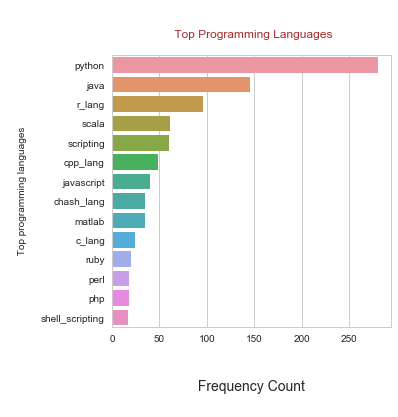

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting Style
bag_of_programming_languages = ['c_lang', 'cpp_lang', 'chash_lang', 'objective_c', 'java', 'python', 'php', 'javascript', 'visual_basic', 'delphi'
                               'perl', 'ruby', 'swift', 'assembly_language', 'go', 'r_lang', 'matlab', 'octave', 'scratch', 'scala',
                                'scripting', 'perl', 'shell_scripting']
x_programming = []
y_programming =[]

zip_all_skills = zip(x_sort, y_sort)

for x,y in zip_all_skills:
    
    if x in bag_of_programming_languages:
        x_programming.append(x)
        y_programming.append(y)
        
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
# Barplot of the Political Parties 

sns.barplot(y_programming,x_programming)

#Axes Labelling

plt.ylabel('\n Top programming languages\n', fontsize=10)
plt.xlabel('\n\n Frequency Count \n', fontsize=14)
plt.title('\n\n Top Programming Languages\n', color='Brown')
#plt.figure(figsize=(200,15))
#Display Plot

plt.show()

#must investigate by c++ and r are not showing up

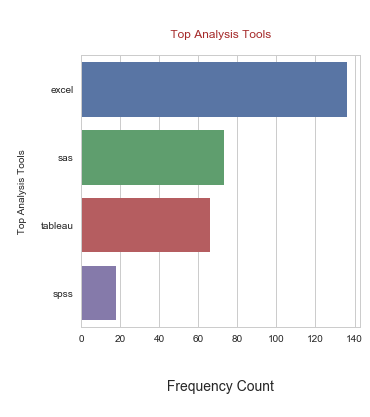

In [17]:
analysis_tool = ['excel','tableau', 'd3.js', 'sas', 'spss', 'd3', 'spotfire'] 
x_analysis = []
y_analysis =[]

zip_all_skills = zip(x_sort, y_sort)

for x,y in zip_all_skills:
    
    if x in analysis_tool:
        x_analysis.append(x)
        y_analysis.append(y)
        
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
# Barplot of the Political Parties 

sns.barplot(y_analysis,x_analysis)

#Axes Labelling

plt.ylabel('\n Top Analysis Tools \n', fontsize=10)
plt.xlabel('\n\n Frequency Count \n', fontsize=14)
plt.title('\n\n Top Analysis Tools \n', color='Brown')
#plt.figure(figsize=(200,15))
#Display Plot

plt.show()



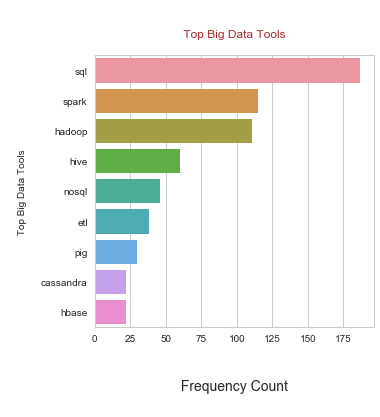

In [19]:
big_data = ['hadoop', 'mapreduce'
                'spark', 'pig',
                'hive', 'shark'
                'oozie', 'zookeeper',
                'flume', 'mahout', 'spark','sql', 'nosql', 'hbase', 'cassandra', 'etl']

#big_data

x_big_data = []
y_big_data =[]

zip_all_skills = zip(x_sort, y_sort)

for x,y in zip_all_skills:
    
    if x in big_data:
        x_big_data.append(x)
        y_big_data.append(y)
        
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
# Barplot of the Political Parties 

sns.barplot(y_big_data,x_big_data)

#Axes Labelling

plt.ylabel('\n Top Big Data Tools \n', fontsize=10)
plt.xlabel('\n\n Frequency Count \n', fontsize=14)
plt.title('\n\n Top Big Data Tools \n', color='Brown')
#plt.figure(figsize=(200,15))
#Display Plot

plt.show()


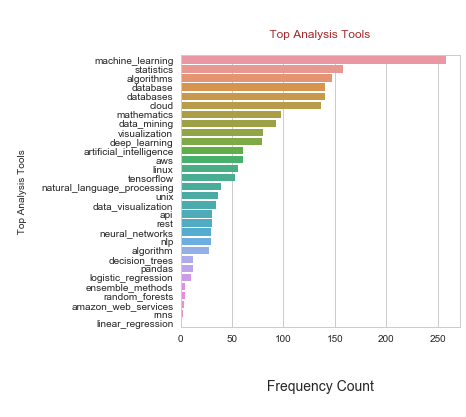

"\nbag.append('tensor flow')\nbag.append('tensorflow')\nbag.append('amazon web services')\nbag.append('logistic regression')\nbag.append('decision trees')\nbag.append('random forests')\nbag.append('neural networks')\nbag.append('bayesian techniques')\nbag.append('ensemble methods')\nbag.append('svms')\nbag.append('gradient boosted machines')\nbag.append('cnns')\nbag.append('cnn')\nbag.append('rnns')\nbag.append('rnn')\nbag.append('evolutionary approaches')\nbag.append('hmms')\nbag.append('hmm')\nbag.append('markov logic networks')\nbag.append('gan')\n\n"

In [21]:
l =[ 'logistic_regression', 'decision_trees', 'random_forests' ,'tensorflow', 'amazon_web_services', 'neural_networks',
    'bayesian_techniques', 'ensemble_methods', 'svms' 'gradient_boosted_machines', 'cnns', 'rnns', 'evolutionary_approaches',
    'hmms', 'markov_logic_networks', 'gan', 'awk', 'algorithms', 'linear_regression', 'statistics', 'cloud', 'aws', 'machine_learning',
   'deep_learning', 'visualization', 'data_mining', 'artificial_intelligence','data_visualization','databases', 'database', 'unix',
   'mathematics', 'natural_language_processing', 'nlp', 'pandas', 'linux', 'api','rest', 'algorithm']
x_l = []
y_l =[]

zip_all_skills = zip(x_sort, y_sort)

for x,y in zip_all_skills:
    
    if x in l:
        x_l.append(x)
        y_l.append(y)
        
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
# Barplot of the Political Parties 

sns.barplot(y_l,x_l)

#Axes Labelling

plt.ylabel('\n Top Analysis Tools \n', fontsize=10)
plt.xlabel('\n\n Frequency Count \n', fontsize=14)
plt.title('\n\n Top Analysis Tools \n', color='Brown')
#plt.figure(figsize=(200,15))
#Display Plot

plt.show()
    
'''
bag.append('tensor flow')
bag.append('tensorflow')
bag.append('amazon web services')
bag.append('logistic regression')
bag.append('decision trees')
bag.append('random forests')
bag.append('neural networks')
bag.append('bayesian techniques')
bag.append('ensemble methods')
bag.append('svms')
bag.append('gradient boosted machines')
bag.append('cnns')
bag.append('cnn')
bag.append('rnns')
bag.append('rnn')
bag.append('evolutionary approaches')
bag.append('hmms')
bag.append('hmm')
bag.append('markov logic networks')
bag.append('gan')

'''

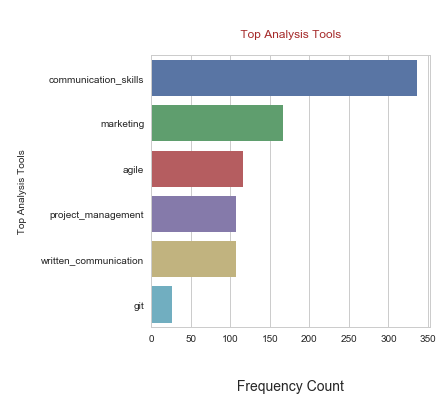

In [22]:
other_skills = ['agile', 'git', 'communication_skills', 'project_management', 'marketing', 'written_communication']
x_l = []
y_l =[]

zip_all_skills = zip(x_sort, y_sort)

for x,y in zip_all_skills:
    
    if x in other_skills:
        x_l.append(x)
        y_l.append(y)
        
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
# Barplot of the Political Parties 

sns.barplot(y_l,x_l)

#Axes Labelling

plt.ylabel('\n Top Analysis Tools \n', fontsize=10)
plt.xlabel('\n\n Frequency Count \n', fontsize=14)
plt.title('\n\n Top Analysis Tools \n', color='Brown')
#plt.figure(figsize=(200,15))
#Display Plot

plt.show()
    

In [23]:
'''
total = bag_of_programming_languages + analysis_tool + big_data + l + other_skills
print(total)


x_others = []
y_others =[]

zip_all_skills = zip(x_sort, y_sort)

for x,y in zip_all_skills:
    
    if x not in total:
        x_others.append(x)
        y_others.append(y)
        
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(5, 50)
# Barplot of the Political Parties 

sns.barplot(y_others,x_others)

#Axes Labelling

plt.ylabel('\n Top Analysis Tools \n', fontsize=10)
plt.xlabel('\n\n Frequency Count \n', fontsize=14)
plt.title('\n\n Top Analysis Tools \n', color='Brown')
#plt.figure(figsize=(200,15))
#Display Plot

plt.show()

'''

'\ntotal = bag_of_programming_languages + analysis_tool + big_data + l + other_skills\nprint(total)\n\n\nx_others = []\ny_others =[]\n\nzip_all_skills = zip(x_sort, y_sort)\n\nfor x,y in zip_all_skills:\n    \n    if x not in total:\n        x_others.append(x)\n        y_others.append(y)\n        \nsns.set(style="whitegrid", color_codes=True)\nfig, ax = plt.subplots()\nfig.set_size_inches(5, 50)\n# Barplot of the Political Parties \n\nsns.barplot(y_others,x_others)\n\n#Axes Labelling\n\nplt.ylabel(\'\n Top Analysis Tools \n\', fontsize=10)\nplt.xlabel(\'\n\n Frequency Count \n\', fontsize=14)\nplt.title(\'\n\n Top Analysis Tools \n\', color=\'Brown\')\n#plt.figure(figsize=(200,15))\n#Display Plot\n\nplt.show()\n\n'

## Bag of Business words

In [5]:

max_results_per_city = 5

columns = ["Links"]
df_business = pd.DataFrame(columns = columns)

base_url = 'https://www.naukri.com/business-manager-jobs-in-'
loc = ['delhi', 'mumbai' , 'chennai', 'pune', 'bengaluru', 'hyderabad', 'noida']
#page = 1
business_words = [] 
for city in loc:
    for start in range(0, max_results_per_city, 1):
        page = requests.get(base_url + str(city) + '&start=' + str(start))

    time.sleep(1)  #ensuring at least 1 second between page grabs
    soup = BeautifulSoup(page.text, 'lxml', from_encoding='utf8')
    for div in soup.find_all(name='div', attrs={'class':'row'}): #the results of each job posting is nested under <div> and
        #has the attritube class = "row result clickcard"
        #specifying row number for index of job posting in dataframe
        #num = (len(df) + 1) #we start with 0 rows, so we add one for each div
        #creating an empty list to hold the data for each posting
        
        #append city name

        for a in div.find_all(name ='a', attrs = {'class' : 'content'}):
            business_words.append(a["href"])
            
            
       
df_business["Links"] = business_words

C:\Users\manig\Anaconda3\lib\site-packages\bs4\__init__.py:146: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


In [6]:
df_business.head()
business = descripe_all_jobs(df_business)

In [7]:
business.to_csv('business_words.csv', encoding='utf8')




df_business = pd.read_csv('business_words.csv')
df_business.head()
bus = df_business['job description'].tolist() 

#print(bus)

#print (df_tech['job description'])


#tech = df_tech['job description'].tolist() #turns pada series to list. tech is a list of strings


#print(type(tech))
business_bag = []
for b in bus: #for each list
    b = ast.literal_eval(b)
    for words in b: #for each element in the list
        #print(words)
        #print(type(words))
        words = words.lower() #make into lower case
        #print(words)
        business_bag.append(words)


busi_words = set(business_bag)
print(busi_words)
print(len(busi_words))


NameError: name 'ast' is not defined

In [ ]:
#we begin by extracting the total number of job posting for each of the following cities
#Cities in Canada
city_set = ['Toronto' , 'Vancouver','Montreal', 'Calgary', 'Waterloo', 'Halifax', 'Ottawa', 'Winnipeg', 'Edmonton'] 
#set column names for pandas dataframe
columns = ["City", "Job title", "Company name", "Location", "Salary", "Links"]
#set the data frame
df = pd.DataFrame(columns = columns)
start = "0" #we start on page zero as we want to extract the total number of job postings
#ensure that our request header is set to firefox
header={
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "Accept-Encoding": "gzip, deflate",
    "Accept-Language": "en-US,en;q=0.9",
    "Connection": "keep-alive",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36",}
t0 = timeit.default_timer() #begin timer
sesh = requests.Session()
max_results_per_city = []
for city in city_set: #for each city in our city_set
    #grab the page 0
    page = sesh.get('https://www.indeed.ca/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start),headers=header)
    #use beautifulsoup to get the text on the page
    soup = BeautifulSoup(page.text, 'lxml')
    #search for <div> with class : resultsTop as it contains the info on the total number of results
    for div in soup.find_all(name='div', attrs={'class':'resultsTop'}):
        
        a = div.find_all(name= "div", attrs = {"id" : "searchCount"})
        a=str(a) #change to a string
        words = BeautifulSoup(a,  'html5lib').get_text() #remove html tags
        max_results = int(words.split(' of ')[1][:-1]) #extract total number of results
        max_results_per_city.append(max_results) #append total number of job postings to max_results_per_city
        


city_max_results = zip(city_set, max_results_per_city) #zip city and total number of job postings 

In [ ]:
#scraping code:
from random import randint
import timeit
header={
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "Accept-Encoding": "gzip, deflate",
    "Accept-Language": "en-US,en;q=0.9",
    "Connection": "keep-alive",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36",}
t0 = timeit.default_timer() #begin timer
sesh = requests.Session()
for city, max_results in city_max_results:
    for start in range(0, max_results, 20):
        time.sleep(randint(1,5))  #ensuring between 1 to 5 seconds between grabs
        page = sesh.get('https://www.indeed.ca/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start),headers=header)
        
        
        soup = BeautifulSoup(page.text, 'lxml')
    
        n_jp = len(soup.find_all(name='div', attrs={'class':'row'}))
        #print('On page %s, got %i postings' % ('https://www.indeed.ca/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start),n_jp))
        for div in soup.find_all(name='div', attrs={'class':'row'}): #the results of each job posting is nested under <div> and
            #has the attritube class = "row result clickcard"
            #specifying row number for index of job posting in dataframe
            num = (len(df) + 1) #we start with 0 rows, so we add one for each div
            #creating an empty list to hold the data for each posting
            job_post = [] 
            #append city name
            job_post.append(city)
        
            #job titles are located within <a> tags and have the attritube "jobtitle"
            for a in div.find_all(name='a', attrs={'data-tn-element':'jobTitle'}): 
                job_post.append(a['title'])
            
            #company name : usually appear in <span> with class : company or result link source
        
            company = div.find_all(name='span', attrs={'class':'company'}) 
            if len(company) > 0: 
                for c in company:
                    job_post.append(c.text.strip()) #removes white space around company name
            else: 
                comp = div.find_all(name='span', attrs={'class':'result-link-source'})
                for c in comp:
                    job_post.append(c.text.strip()) 
                
            #location names appear within <span> with class : location 
            loc = div.findAll(name= 'span', attrs={'class': 'location'}) 
            for span in loc: 
                job_post.append(span.text) 
        
            #salary info
        
            try: 
                salary = div.find_all(name= "span", attrs = {"class" : "no-wrap"})
            
                if len(salary) > 0:
                    for s in salary:
                        job_post.append(s.text.strip())
                else: 
                    job_post.append('no salary info')
            except : 
                job_post.append('no salary info')
        

            #links to the job posting
    
            tags = div.find_all(name ='h2', attrs ={"class":"jobtitle"})

            if len(tags) > 0:
                for aTag in tags:
         
                    for a in aTag.find_all(name = "a", attrs={"class" : "turnstileLink"}):
                
                        job_post.append("http://www.indeed.ca%s" %a["href"])
                    #appending list of job post info to dataframe at index num
                df.loc[num] = job_post
                
            else: #for sponsored links, the structure is a little different
                '''
                for a in div.find_all(name ='a', attrs = {'class' : 'jobtitle turnstileLink'}):
                    job_post.append("http://www.indeed.ca%s" %a["href"])
                '''
                pass #do not extract the sponspored link
        
       

        
df.to_csv('indeed_business_data.csv', encoding='utf8')
       
        
            

#saving sample_df as a local csv file — define your own local path to save contents 
t1 = timeit.default_timer() #end timer


In [ ]:
import re
import string

# functions to check if our dataframe which contains job posting urls from indeed contains the skills in business bag

def get_one_business_skill(linksy): #from one url link, get the business skill
    description = []

    url = requests.get(linksy)
    time.sleep(1)
    soup = BeautifulSoup(url.text,  'html5lib')

    bus_description = soup.find_all(name="span", attrs={"class": "summary"})
    bus_des=str(bus_description)
    text = BeautifulSoup(busi_des, 'html5lib').get_text()
    
    
    text = text.lower()        
    #text_token = (word_tokenize(text)) 
   
    for words in busi_words: #for words in the business bag
    
        bussiness_word = re.search("(?:^|\W)"+ re.escape(words)+"(?:$|\W)", text) #look for the business word in our job posting
    
        if business_word != None: #if we find the business word
            buzz = business_word.group(0) 
            buzz= business.strip() #remove all white spaces surrounding it
            
            buzz= "".join((char for char in techno if char not in ",")) #removes any "," surrounding it, e.g presention, --> presentation
            
            if buzz == 'c++': #if it is c++
                buzzi = 'cpp_lang' #change name to cpp_lang (so that countvectorizer will take it into consideration later)
            elif buzz == 'c':
                buzzi = 'c_lang'
            elif buzz == 'c#':
                buzzi = 'chash_lang'
            elif buzz == 'r':
                #print(techno)
                buzzi = 'r_lang'
            elif buzz == 'r&': #r& comes from research and development, so we do not want it
                buzzi = ''
            else:
                buzzi = "".join((char for char in techno if char not in string.punctuation)) #remove any puncutation, e.g sql/ --> sql

            if len(buzzi) > 0: #if the length of buzzi > 0
                description.append(buzzi) #append it to description
                b=[item.split(' ') for item in description]
                c=['_'.join(item) for item in b] #puts an underscore between words, e.g communication skills comes communcation_skill
                d=' '.join(c) #joins into a string
        
    return d


def get_all_business_skills(data): #input is pandas dataframe
    data_copy = data.copy()
    #applies get_one_business skill function to all job postings to extract business skills for each posting
    
    data_copy['business skills'] = data_copy['Links'].apply(get_one_tech_skill) 
    return data_copy

indeed_business_data= pd.read_csv('indeed_business_data.csv') #change this to whatever you want as input dataframe

import timeit

t0 = timeit.default_timer() #begin timer

full_business_data = get_all_business_skills(indeed_business_data) #extract all tech words from each job posting

t1 = timeit.default_timer() #end timer

full_business_data.head()

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
data = full_business_data.copy() 
x_train = data["business skills"] #df_x = cleaned classfied tweets input independent variable 



cv = CountVectorizer(stop_words='english', min_df = 0.00)



#tfidvectorizer extracts the frequency of words from each indivial tweet in the x_train dataset

#x_traincv = cv.fit_transform(x_train) 
#x_testtv = tv.transform(x_test)
#print(x_traincv.toarray())
#print(cv.get_feature_names())
matrix = cv.fit_transform(x_train)
feature = cv.get_feature_names()
print(matrix.toarray())
print(type(matrix.sum(axis=0)))
frequency =  matrix.sum(axis=0)
freq = np.array(frequency).reshape(-1,)
print(freq)
freqs = zip(feature, freq)    
#for x,y in freqs:
#    print(y)
    
print(sorted(freqs, key=lambda x: -x[1]))
# sort from largest to smallest
#for x,y in freqs:
#   print(x,y)
#print(matrix.toarray())
#print(feature)
#print((matrix.sum(axis = 0)))
#print(sorted(freqs, key=lambda x: -x[1]))
#print(len(cv.get_feature_names()))

'''

In [ ]:
'''
frequency =  matrix.sum(axis=0)
freq = np.array(frequency).reshape(-1,)
print(freq)
freqs = zip(feature, freq)    
#for x,y in freqs:
#    print(y)
x_sort = []
y_sort=[]
feature_freq = sorted(freqs, key=lambda x: -x[1])
for x, y in feature_freq:
    x_sort.append(x)
    y_sort.append(y)
    
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting Style

sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(15, 20)
# Barplot of the Political Parties 

sns.barplot(y_sort,x_sort)

#Axes Labelling

plt.ylabel('\n Top Skills\n', fontsize=10)
plt.xlabel('\n\n Frequency Count \n', fontsize=14)
plt.title('\n\n Top Skill Sets\n', color='Brown')
#plt.figure(figsize=(200,15))
#Display Plot

plt.show()

# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.violinplot(data=d, inner="points", ax=ax)    
sns.despine()

fig.savefig('example.png')
'''

In [ ]:
from pylab import imread,subplot,imshow,show
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('toronto-skyline-black-silhouette.png')
imgplot = plt.imshow(img)
plt.show()

'''
imageMask = np.array(Image.open('trudeau2.png'))

wc = WordCloud(scale = 4,  background_color='white', max_words=1000, mask=imageMask)
wc.generate(" ".join(tweets[tweets['party'] == 'liberal']['tweets']))

image_colors = ImageColorGenerator(imageMask)   
wc = wc.recolor(color_func=image_colors)

figure = plt.figure(figsize = (15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
'''

In [ ]:
#wc = WordCloud(scale = 4,  background_color='white', max_words=1000, mask=img)

In [ ]:
'''
try:
    from PIL import Image
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
except:
    ! pip install wordcloud
'''

In [ ]:
#! pip install wordcloud-1.4-cp36-cp36m-win_amd64.whl

In [ ]:
#from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
'''
imageMask = np.array(Image.open('toronto-skyline-black-silhouette.png'))

wc = WordCloud(scale = 4,  background_color='white', max_words=1000, mask=imageMask)
#wc.generate(" ".join(data["job description"]))

image_colors = ImageColorGenerator(imageMask)   
#wc = wc.recolor(color_func=image_colors)

#figure = plt.figure(figsize = (15,10))
#plt.imshow(wc, interpolation='bilinear')
#plt.axis("off")
#plt.show()
'''

In [ ]:
'''
imageMask = np.array(Image.open('toronto_skyline_gray-f61fa5446a3ebe54a8e047edae0a1a4f.png'))

wc = WordCloud(scale = 4,  background_color='white', max_words=2000, mask=imageMask, random_state=42)
wc.generate(str1)

#image_colors = ImageColorGenerator(imageMask)   
#wc = wc.recolor(color_func=image_colors)
wc.to_file("github_wordcloud.png")
figure = plt.figure(figsize = (30,100))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

'''

In [ ]:
'''
#imageMask = np.array(Image.open('toronto_skyline_gray-f61fa5446a3ebe54a8e047edae0a1a4f.png'))
icon = Image.open('toronto_skyline_gray-f61fa5446a3ebe54a8e047edae0a1a4f.png')

mask = Image.new("RGB", icon.size, (255,255,255))

mask.paste(icon,icon)

mask = np.array(mask)



wc = WordCloud(background_color="white", max_words=2000, mask=mask, max_font_size=300)

               

# generate word cloud
wc.generate(str1)
#wc.generate_from_frequencies(words_array)

#wc.recolor(color_func=grey_color_func)
plt.axis("off")
plt.show()

'''

In [ ]:
'''
import numpy as np

import csv

import random

from PIL import Image

from wordcloud import WordCloud, STOPWORDS


#print(str1)
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):

    return "hsl(0, 0%%, %d%%)" % random.randint(10, 50)



#csv_path = "github_words.csv"

#fa_path = "/Users/maxwoolf/Downloads/exported2048/"

#font_path = "/Users/maxwoolf/Fonts/mplus-1m-regular.ttf"



#icon = "github"






# http://stackoverflow.com/questions/7911451/pil-convert-png-or-gif-with-transparency-to-jpg-without



icon = Image.open('toronto-clipart-1.png')

mask = Image.new("RGB", icon.size, (255,255,255))

mask.paste(icon,icon)

mask = np.array(mask)



wc = WordCloud(background_color="white", max_words=2000, mask=mask,

               max_font_size=300, scale = 4)

#a = wc.process_text(str1)
letter1 =' '.join(map(str, str1))
print(type(a))
wc.generate(letter1)
print(type(str1))
wc.recolor(color_func=grey_color_func)

wc.to_file("github_wordcloud.png")

print(str1)

               

# generate word cloud

wc.generate(str1)

wc.recolor(color_func=grey_color_func)

wc.to_file("github_wordcloud.png")

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
'''

# USA

In [43]:
# USA
#we begin by extracting the total number of job posting for each of the following cities
#Cities in Canada
city_set = ['Washington+DC', 'Boulder','New+York','Chicago','San+Francisco', 'Austin', 'Seattle', 'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas',
            'Pittsburgh', 'Portland', 'Phoenix', 'Denver', 'Houston'] 
#set column names for pandas dataframe
columns = ["City", "Job title", "Company name", "Location", "Salary", "Links"]
#set the data frame
df = pd.DataFrame(columns = columns)
start = "0" #we start on page zero as we want to extract the total number of job postings
#ensure that our request header is set to firefox
header={
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "Accept-Encoding": "gzip, deflate",
    "Accept-Language": "en-US,en;q=0.9",
    "Connection": "keep-alive",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36",}
t0 = timeit.default_timer() #begin timer
sesh = requests.Session()
max_results_per_city = []
for city in city_set: #for each city in our city_set
    #grab the page 0
    n_jp = len(soup.find_all(name='div', attrs={'class':'row'}))
    print('On page %s, got %i postings' % ('https://www.indeed.com/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start), n_jp))
    page = sesh.get('https://www.indeed.com/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start),headers=header)
    #use beautifulsoup to get the text on the page
    soup = BeautifulSoup(page.text, 'lxml')
    #search for <div> with class : resultsTop as it contains the info on the total number of results
    for div in soup.find_all(name='div', attrs={'class':'resultsTop'}):
        
        a = div.find_all(name= "div", attrs = {"id" : "searchCount"})
        a=str(a) #change to a string
        words = BeautifulSoup(a,  'html5lib').get_text() #remove html tags
        max_results = (words.split(' of ')[1][:-1])
        maxi = "".join(char for char in max_results if char not in string.punctuation)
        maxi = int(maxi.split(" ")[0])
        #extract total number of results
        max_results_per_city.append(maxi) #append total number of job postings to max_results_per_city
        


city_max_results = zip(city_set, max_results_per_city) #zip city and total number of job postings 
#for x, y in city_max_results :
#    print(x)
#    print(y)

On page https://www.indeed.com/jobs?q=data+scientist+&l=Washington+DC&start=0, got 16 postings
On page https://www.indeed.com/jobs?q=data+scientist+&l=Boulder&start=0, got 16 postings
On page https://www.indeed.com/jobs?q=data+scientist+&l=New+York&start=0, got 15 postings
On page https://www.indeed.com/jobs?q=data+scientist+&l=Chicago&start=0, got 16 postings
On page https://www.indeed.com/jobs?q=data+scientist+&l=San+Francisco&start=0, got 16 postings
On page https://www.indeed.com/jobs?q=data+scientist+&l=Austin&start=0, got 16 postings
On page https://www.indeed.com/jobs?q=data+scientist+&l=Seattle&start=0, got 15 postings
On page https://www.indeed.com/jobs?q=data+scientist+&l=Los+Angeles&start=0, got 16 postings
On page https://www.indeed.com/jobs?q=data+scientist+&l=Philadelphia&start=0, got 16 postings
On page https://www.indeed.com/jobs?q=data+scientist+&l=Atlanta&start=0, got 15 postings
On page https://www.indeed.com/jobs?q=data+scientist+&l=Dallas&start=0, got 15 postings
O

In [44]:
#we begin by extracting the total number of job posting for each of the following cities


#scraping code:
from random import randint
import timeit
header={
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "Accept-Encoding": "gzip, deflate",
    "Accept-Language": "en-US,en;q=0.9",
    "Connection": "keep-alive",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36",}
t0 = timeit.default_timer() #begin timer
sesh = requests.Session()
#print("hello")

#for city, max_results in city_max_results:
#    print(city)

for city, max_results in city_max_results:
    print(city)
    for start in range(0, max_results, 10):
        time.sleep(randint(1,5))  #ensuring between 1 to 5 seconds between grabs
        page = sesh.get('https://www.indeed.com/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start),headers=header)
        
        
        soup = BeautifulSoup(page.text, 'lxml')
    
        #n_jp = len(soup.find_all(name='div', attrs={'class':'row'}))
        #print('On page %s, got %i postings' % ('https://www.indeed.ca/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start),n_jp))
        for div in soup.find_all(name='div', attrs={'class':'row'}): #the results of each job posting is nested under <div> and
            #has the attritube class = "row result clickcard"
            #specifying row number for index of job posting in dataframe
            num = (len(df) + 1) #we start with 0 rows, so we add one for each div
            #creating an empty list to hold the data for each posting
            job_post = [] 
            #append city name
            job_post.append(city)
        
            #job titles are located within <a> tags and have the attritube "jobtitle"
            for a in div.find_all(name='a', attrs={'data-tn-element':'jobTitle'}): 
                job_post.append(a['title'])
            
            #company name : usually appear in <span> with class : company or result link source
        
            company = div.find_all(name='span', attrs={'class':'company'}) 
            if len(company) > 0: 
                for c in company:
                    job_post.append(c.text.strip()) #removes white space around company name
            else: 
                comp = div.find_all(name='span', attrs={'class':'result-link-source'})
                for c in comp:
                    job_post.append(c.text.strip()) 
                
            #location names appear within <span> with class : location 
            loc = div.findAll(name= 'span', attrs={'class': 'location'}) 
            for span in loc: 
                job_post.append(span.text) 
        
            #salary info
        
            try: 
                salary = div.find_all(name= "span", attrs = {"class" : "no-wrap"})
            
                if len(salary) > 0:
                    for s in salary:
                        job_post.append(s.text.strip())
                else: 
                    job_post.append('no salary info')
            except : 
                job_post.append('no salary info')
        

            #links to the job posting
    
            tags = div.find_all(name ='h2', attrs ={"class":"jobtitle"})

            if len(tags) > 0:
                for aTag in tags:
         
                    for a in aTag.find_all(name = "a", attrs={"class" : "turnstileLink"}):
                
                        job_post.append("http://www.indeed.com%s" %a["href"])
                    #appending list of job post info to dataframe at index num
                df.loc[num] = job_post
                
            else: #for sponsored links, the structure is a little different
                '''
                for a in div.find_all(name ='a', attrs = {'class' : 'jobtitle turnstileLink'}):
                    job_post.append("http://www.indeed.com%s" %a["href"])
                '''
                pass #do not extract the sponspored link
        
       

        

       
        
            



Washington+DC
Boulder
New+York
Chicago
San+Francisco
Austin
Seattle
Los+Angeles
Philadelphia
Atlanta
Dallas
Pittsburgh
Portland
Phoenix
Denver
Houston


In [45]:
t1 = timeit.default_timer() #end timer

df.to_csv('indeed_data_usa.csv', encoding='utf8')
print(t1 - t0)
print(len(df))

4911.903348937507
13054


In [ ]:


import re
import string



def get_one_tech_skill(linksy):
    description = []

    url = requests.get(linksy)
    time.sleep(randint(1,8))
    soup = BeautifulSoup(url.text,  'html5lib')

    tech_description = soup.find_all(name="span", attrs={"class": "summary"})
    tech_des=str(tech_description)
    text = BeautifulSoup(tech_des, 'html5lib').get_text()
    
    
    text = text.lower()        
    #text_token = (word_tokenize(text)) 
   
    for words in tech_words:
    
        techie_word = re.search("(?:^|\W)"+ re.escape(words)+"(?:$|\W)", text) 
    
        if techie_word != None:
            techno = techie_word.group(0)
            techno= techno.strip()
            
            techno= "".join((char for char in techno if char not in ","))
            
            if techno == 'c++':
                tech = 'cpp_lang'
            elif techno == 'c':
                tech = 'c_lang'
            elif techno == 'c#':
                tech = 'chash_lang'
            elif techno == 'r':
                #print(techno)
                tech = 'r_lang'
            elif techno == 'r&':
                tech = ''
            else:
                tech = "".join((char for char in techno if char not in string.punctuation))

            if len(tech) > 0:
                description.append(tech)
                b=[item.split(' ') for item in description]
                c=['_'.join(item) for item in b]
                d=' '.join(c)
        
    return d


def get_all_tech_skills(data):
    data_copy = data.copy()
    #applies get_one_tech skill function to all job postings to extract tech skills for each posting
    #['tech skills" column will show tech skills for each job]
    data_copy['tech skills'] = data_copy['Links'].apply(get_one_tech_skill) 
    return data_copy

indeed_data= pd.read_csv('indeed_data_usa.csv')




import timeit

t0 = timeit.default_timer() #begin timer

full_data = get_all_tech_skills(indeed_data) #extract all tech words from each job posting

t1 = timeit.default_timer() #end timer

print(t1-t0)
full_data.head()
df_indeed_usa = full_data.drop('Links', 1)


df_indeed_usa.to_csv('indeed_usa.csv', encoding='utf8')



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

data = full_data.copy() 
x_train = data["tech skills"] 


cv = CountVectorizer(stop_words='english', min_df = 0.00)




matrix = cv.fit_transform(x_train)
feature = cv.get_feature_names()
print(matrix.toarray())
print(type(matrix.sum(axis=0)))
frequency =  matrix.sum(axis=0)
freq = np.array(frequency).reshape(-1,)
print(freq)
freqs = zip(feature, freq)    
#for x,y in freqs:
#    print(y)
x_sort = []
y_sort=[]
feature_freq = sorted(freqs, key=lambda x: -x[1])
for x, y in feature_freq:
    x_sort.append(x)
    y_sort.append(y)
# sort from largest to smallest
#for x,y in freqs:
#   print(x,y)
#print(matrix.toarray())
#print(feature)
#print((matrix.sum(axis = 0)))
#print(sorted(freqs, key=lambda x: -x[1]))
#print(len(cv.get_feature_names()))

import seaborn as sns
import matplotlib.pyplot as plt
# Plotting Style
bag_of_programming_languages = ['c_lang', 'cpp_lang', 'chash_lang', 'objective_c', 'java', 'python', 'php', 'javascript', 'visual_basic', 'delphi'
                               'perl', 'ruby', 'swift', 'assembly_language', 'go', 'r_lang', 'matlab', 'octave', 'scratch', 'scala',
                                'scripting', 'perl', 'shell_scripting']
x_programming = []
y_programming =[]

zip_all_skills = zip(x_sort, y_sort)

for x,y in zip_all_skills:
    
    if x in bag_of_programming_languages:
        x_programming.append(x)
        y_programming.append(y)
        
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
# Barplot of the Political Parties 

sns.barplot(y_programming,x_programming)

#Axes Labelling

plt.ylabel('\n Top programming languages\n', fontsize=10)
plt.xlabel('\n\n Frequency Count \n', fontsize=14)
plt.title('\n\n Top Programming Languages\n', color='Brown')
#plt.figure(figsize=(200,15))
#Display Plot

plt.show()

#must investigate by c++ and r are not showing up